In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
u = files.upload()

Saving Position_Salaries.csv to Position_Salaries (2).csv


In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

In [0]:
Y.reshape(-1, 1)

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [0]:
#Here, Y has only one feature so it will be considered as a vector. But, we need a 2D array for all the operations. Hence, converting it.
Y = Y.reshape(len(Y), 1)

In [0]:
#In svr, feature scaling needs to be done manually because, it is not included in the library
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [30]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Predicting the results
#First, we are applying feature scaling to the number we are predicting result to and then we are inverse scaling the obtained result to understad it
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [37]:
Y_pred

array([252789.13921624])

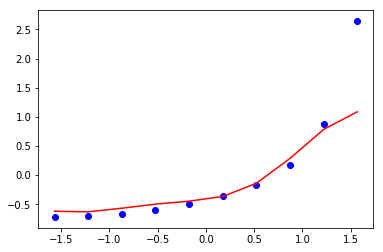

In [38]:
#Visualising the result
plt.scatter(X, Y, color='blue')
plt.plot(X, regressor.predict(sc_X.transform(X)), color='red')